# Classification with Neural Networks

Titouan Vayer, titouan.vayer@inria.fr 
Aurélien Garivier, aurelien.garivier@ens-lyon.fr

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

We use the dataset "two-moons" 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

In [3]:
X, y = datasets.make_moons(n_samples= 1000, random_state = 42, noise = 0.1)

# On split en train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=False
)


#pytorch ne prend que des tenseurs torch en entrée: pas des numpy array
Xt = torch.from_numpy(X_train).type(torch.FloatTensor)
yt = torch.from_numpy(y_train).type(torch.LongTensor)

#### Q: Display the entire dataset

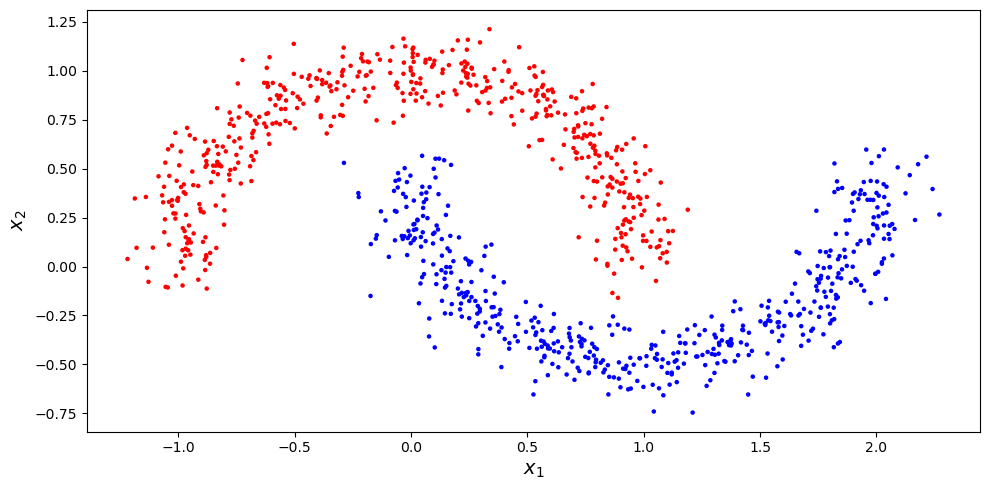

In [4]:
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(X[:,0], X[:,1], s = 5, color = [colors[y[i]] for i in range(y.shape[0])])
ax.set_xlabel('$x_1$',fontsize = 14)
ax.set_ylabel('$x_2$',fontsize = 14)
fig.tight_layout()

Let us now create the neural network that we use for classification:

In [5]:
class NeuralNetworkClassifier(nn.Module):
    def __init__(self, d1 = 10):
        super(NeuralNetworkClassifier,self).__init__()
        self.fc1 = nn.Linear(2,d1)
        
        self.fc15 = nn.Linear(d1, d1)
        
        self.fc2 = nn.Linear(d1,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = nn.functional.relu(x)
        
        x = self.fc15(x)
        x = nn.functional.relu(x)
        
        x = self.fc2(x)
        return torch.sigmoid(x)
    
    def predict(self,x):
        pred = self.forward(x)
        ans = []
        #Predict the class with highest score
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

#### Q: Comment the structure of the neural network. What is different from the case of regression?

Let us now train the network

In [6]:
model = NeuralNetworkClassifier(10)
learning_rate = 2e-2
epochs = 150

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [7]:
losses = []
test_acc = []
for i in range(epochs):
    # Compute prediction and loss
    pred = model(Xt)
    loss = loss_fn(pred, yt)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    # On calcule la prédiction sur l'échantillon de test
    test_pred = model.predict(torch.from_numpy(X_test).type(torch.FloatTensor)).numpy()
    # On regarde l'accuracy
    test_acc.append(metrics.accuracy_score(y_test,test_pred))


Text(0.5, 0, 'Iterations')

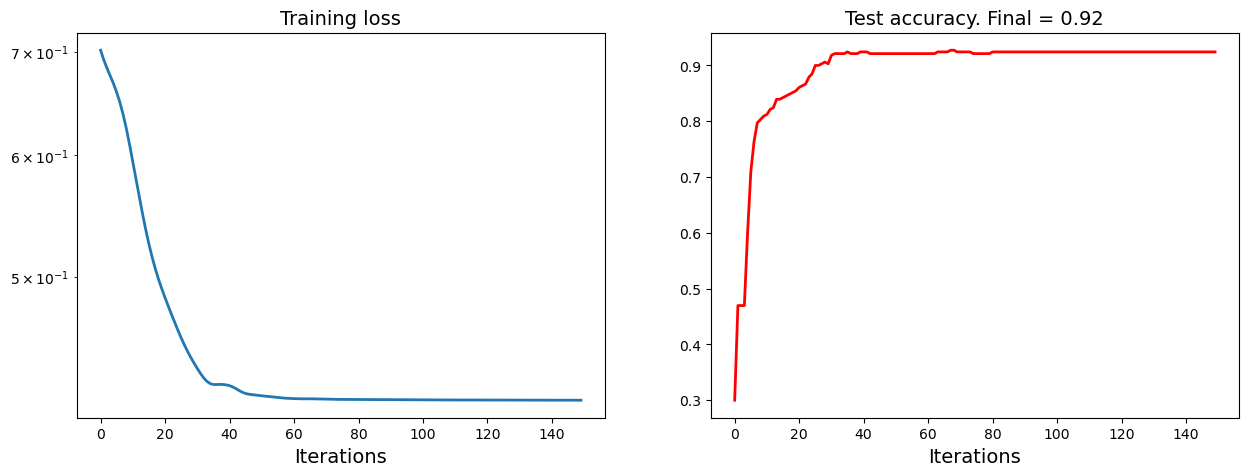

In [8]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.semilogy(losses, lw = 2)
plt.title('Training loss', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)

plt.subplot(1,2,2)
plt.plot(test_acc, c = 'r', lw = 2)
plt.title('Test accuracy. Final = {0:.2f}'.format(test_acc[-1]), fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)


#### Q: What do you think about this model? Comment the obtained plots

Let us now display the classficiation frontier of our model

In [9]:
def predict(x, model):
    #Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    #Predict and return ans
    ans = model.predict(x)
    return ans.numpy()

In [10]:
# Helper function to plot a decision boundary.
from matplotlib.colors import ListedColormap

colors = ['red', 'blue']

def plot_decision_boundary(pred_func, X,y):
    cm_bright = ListedColormap(["#539CFF","#FFD053"])
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=cm_bright)
    plt.scatter(X[:, 0], X[:, 1], c= [colors[y[i]] for i in range(y.shape[0])], cmap=cm_bright)

/tmp/ipykernel_166034/1100694467.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c= [colors[y[i]] for i in range(y.shape[0])], cmap=cm_bright)


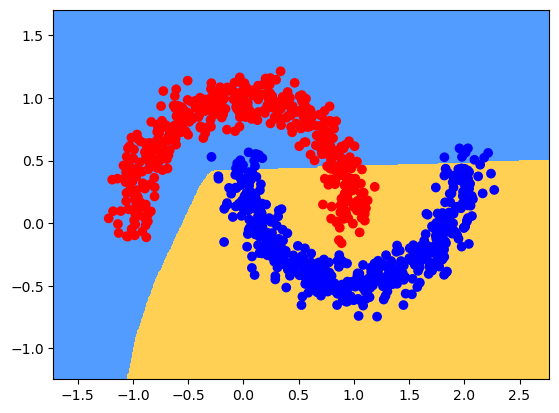

In [11]:
plot_decision_boundary(lambda x : predict(x, model) , X, y)

#### Q: Now that you have this display, what do you think about the model? What should we change? Do it!

In [44]:
pred = model(Xt[0])
predScores = pred.detach().numpy()
lab = int(yt[0].detach().numpy()) 
[np.log(sum([np.exp(x) for x in predScores])) - predScores[lab], nn.CrossEntropyLoss()(pred, yt[0]).detach().numpy()]

[0.7750476222863569, array(0.7750476, dtype=float32)]